# Dash Board metric

Create a summary visualization that shows:
1. Total number of tests per month (all systems combined)
2. Breakdown by data source (stacked bar chart recommended)
3. Identify any gaps or unusual patterns in data collection


Focus group data:

Download and upload output/3.2-1_all_clean_metrics_records_wide_format.csv

link: https://github.com/y0y0l0/507_groupproject_2025/blob/main/output/3.2-1_all_clean_metrics_records_wide_format.csv

In [55]:
library(dplyr)
library(ggplot2)
library(lubridate)

In [56]:
all_records_data <- read.csv('/content/3.2-1_all_clean_metrics_records_wide_format.csv')
# print(all_records_data) USE ONLY TO VIEW AND READ ALL OF CSV

head(all_records_data)

,X,playername,timestamp,team,data_source,accel_load_accum,distance_total,leftMaxForce,leftTorque,rightMaxForce,rightTorque,avg_torque_asymmetry,avg_max_force_asymmetry
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,PLAYER_002,2022-07-06 16:30:00,Mens Basketball,kinexon,500.2222,3598.033,NA,NA,NA,NA,NA,NA
2,1,PLAYER_002,2022-07-07 16:30:00,Mens Basketball,kinexon,374.5944,2860.270,NA,NA,NA,NA,NA,NA
3,2,PLAYER_002,2022-07-08 16:15:00,Mens Basketball,kinexon,325.3232,2485.923,NA,NA,NA,NA,NA,NA
4,3,PLAYER_002,2022-07-11 16:30:00,Mens Basketball,kinexon,458.0861,3504.654,NA,NA,NA,NA,NA,NA
5,4,PLAYER_002,2022-07-12 16:30:00,Mens Basketball,kinexon,503.7700,4096.328,NA,NA,NA,NA,NA,NA
6,5,PLAYER_002,2022-07-13 16:10:00,Mens Basketball,kinexon,426.8244,3243.928,NA,NA,NA,NA,NA,NA


### charts based on time

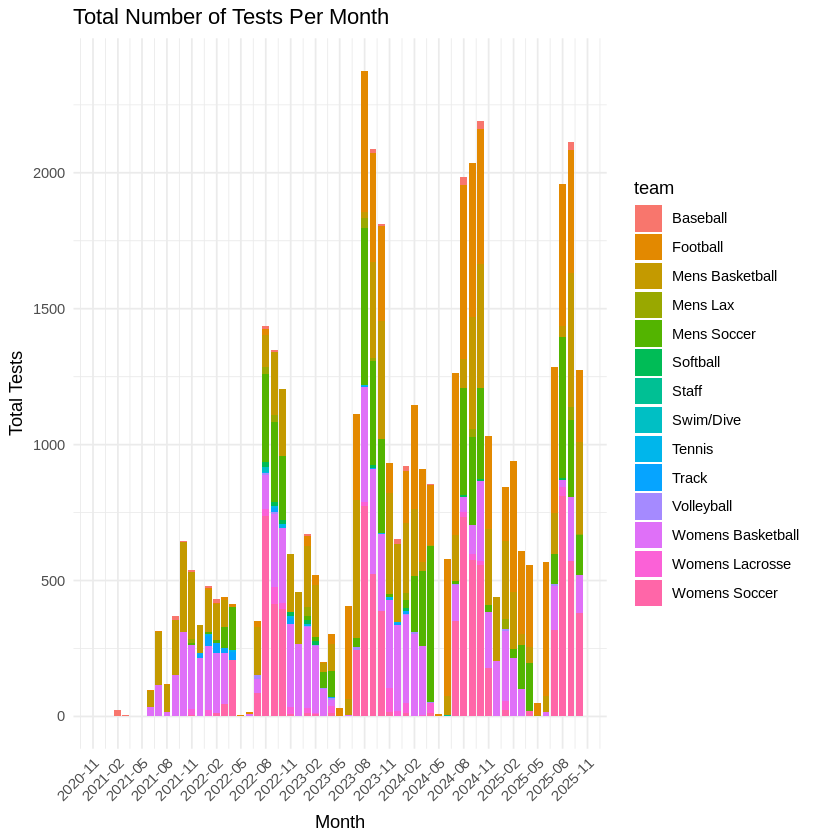

In [57]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_source <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_source) > 0) {
    ggplot(monthly_tests_by_source, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month",
           x = "Month",
           y = "Total Tests",
           fill = "team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

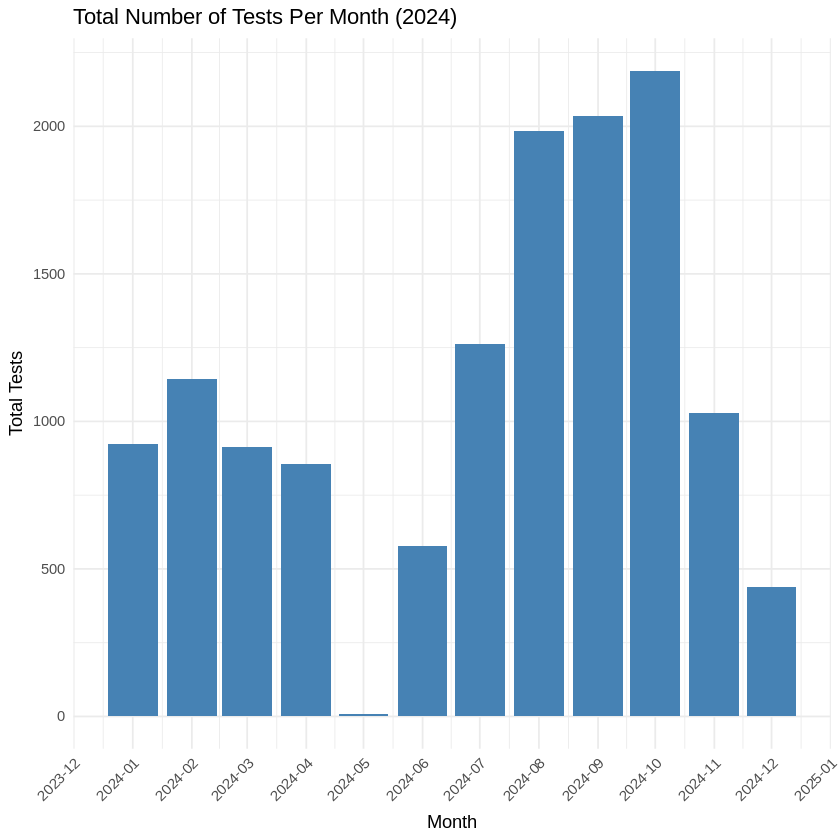

In [58]:
if ("timestamp" %in% colnames(all_records_data)) {
  monthly_tests <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(year(month_year) == 2024) %>%
    group_by(month_year) %>%
    summarise(total_tests = n(), .groups = 'drop') # .groups = 'drop' to avoid group warnings
if (nrow(monthly_tests) > 0) {
    ggplot(monthly_tests, aes(x = month_year, y = total_tests)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      labs(title = "Total Number of Tests Per Month (2024)",
           x = "Month",
           y = "Total Tests") +
      theme_minimal() +
      scale_x_date(date_breaks = "1 month", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}


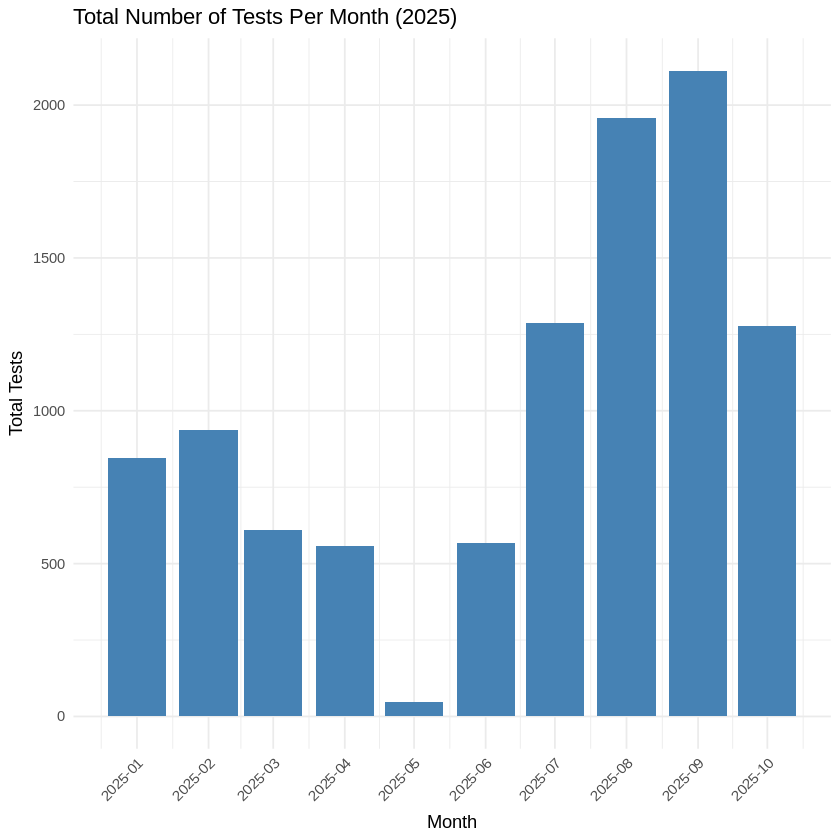

In [59]:
if ("timestamp" %in% colnames(all_records_data)) {
  monthly_tests <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(year(month_year) == 2025) %>%
    group_by(month_year) %>%
    summarise(total_tests = n(), .groups = 'drop') # .groups = 'drop' to avoid group warnings
if (nrow(monthly_tests) > 0) {
    ggplot(monthly_tests, aes(x = month_year, y = total_tests)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      labs(title = "Total Number of Tests Per Month (2025)",
           x = "Month",
           y = "Total Tests") +
      theme_minimal() +
      scale_x_date(date_breaks = "1 month", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

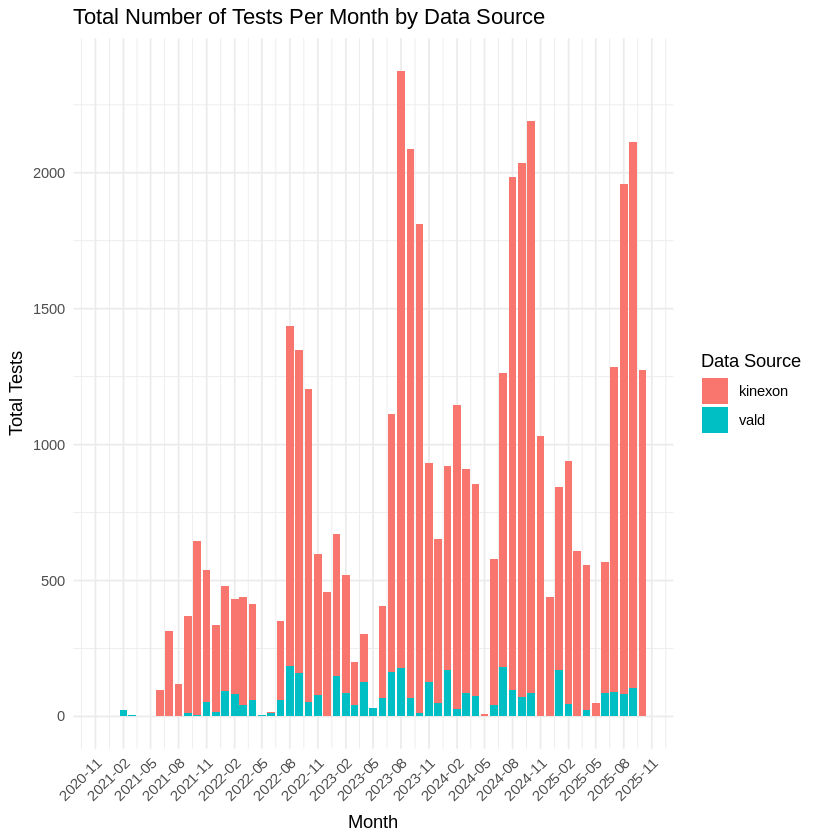

In [60]:
if ("timestamp" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
  monthly_tests_by_source <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_source) > 0) {
    ggplot(monthly_tests_by_source, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month by Data Source",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

Warning message:
“Removed 1235 rows containing missing values or values outside the scale range
(`geom_line()`).”


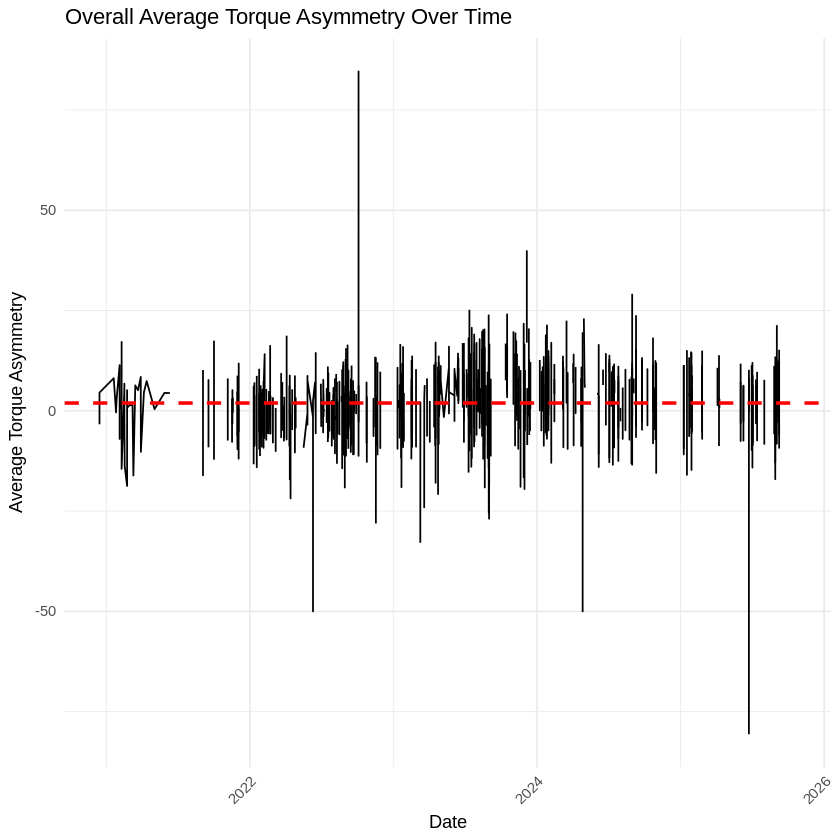

In [111]:
if ("timestamp" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data_all <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data_all) > 0) {
    overall_average_asymmetry <- asymmetry_data_all %>%
      summarise(mean_asymmetry = mean(avg_torque_asymmetry, na.rm = TRUE)) %>%
      pull(mean_asymmetry)

    ggplot(asymmetry_data_all, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      geom_hline(yintercept = overall_average_asymmetry, linetype = "dashed", color = "red", size = 1) +
      labs(title = "Overall Average Torque Asymmetry Over Time",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_line()`).”


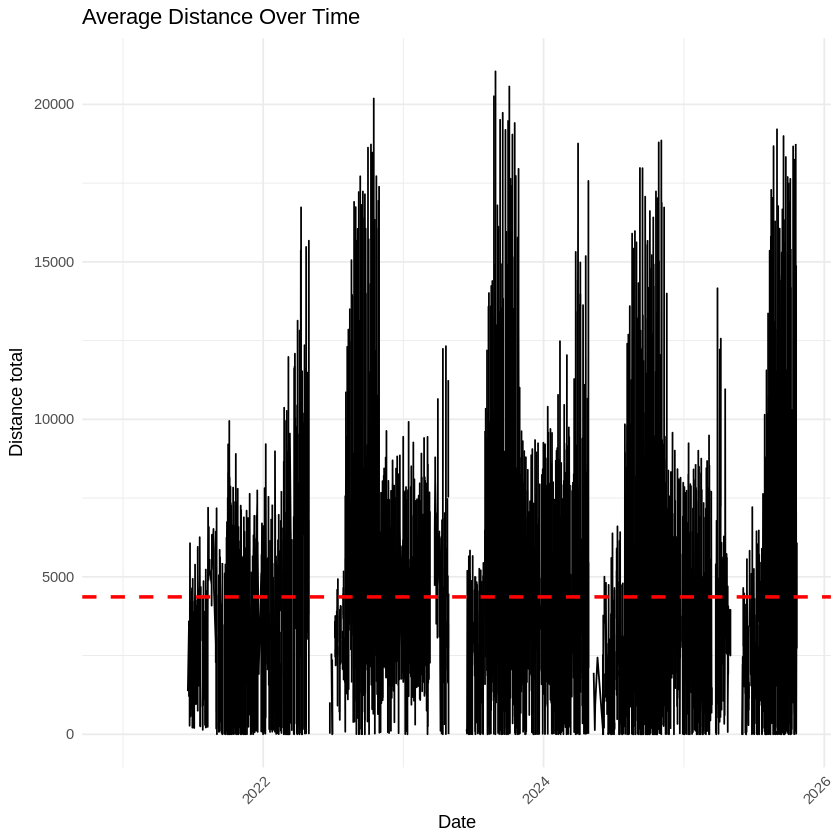

In [117]:
if ("timestamp" %in% colnames(all_records_data) && "distance_total" %in% colnames(all_records_data)) {
  distance_data_all <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(distance_data_all) > 0) {
    overall_average_asymmetry <- distance_data_all %>%
      summarise(mean_asymmetry = mean(distance_total, na.rm = TRUE)) %>%
      pull(mean_asymmetry)

    ggplot(distance_data_all, aes(x = record_date_parsed, y = distance_total)) +
      geom_line() +
      geom_hline(yintercept = overall_average_asymmetry, linetype = "dashed", color = "red", size = 1) +
      labs(title = "Average Distance Over Time",
           x = "Date",
           y = "Distance total") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

# charts based on team

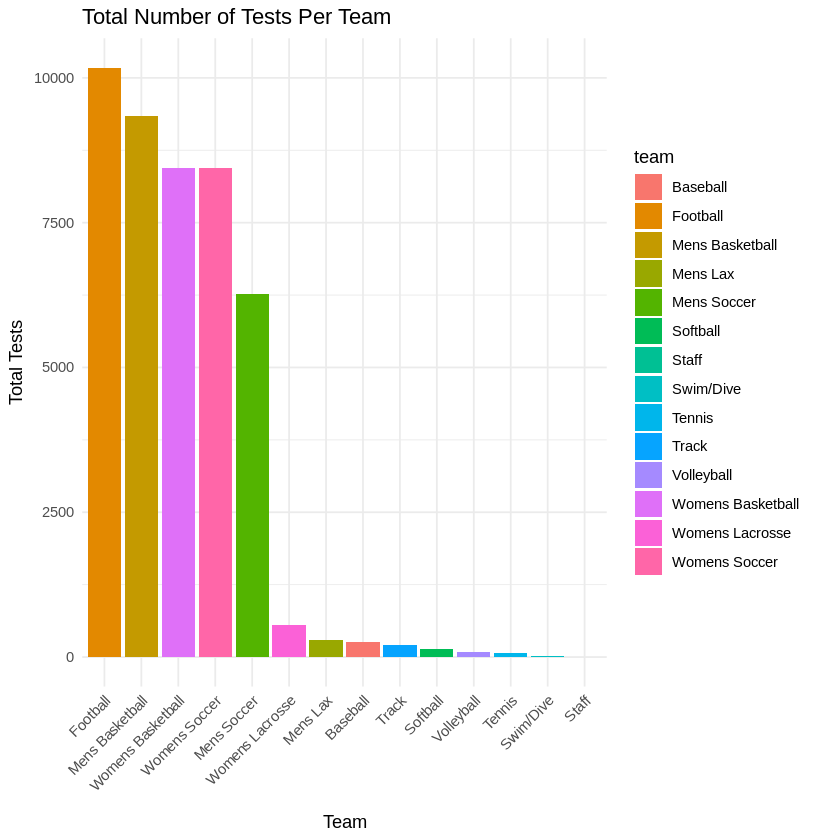

In [61]:
if ("team" %in% colnames(all_records_data)) {
  tests_by_team <- all_records_data %>%
    group_by(team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(tests_by_team) > 0) {
    ggplot(tests_by_team, aes(x = reorder(team, -total_tests), y = total_tests, fill = team)) +
      geom_bar(stat = "identity") +
      labs(title = "Total Number of Tests Per Team",
           x = "Team",
           y = "Total Tests") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

note to self
focus on primary teams:

1. Football (US)
2. Mens Basketball
3. Womens Basketball
4. Women's Soccer
5. Men's Soccer


football section

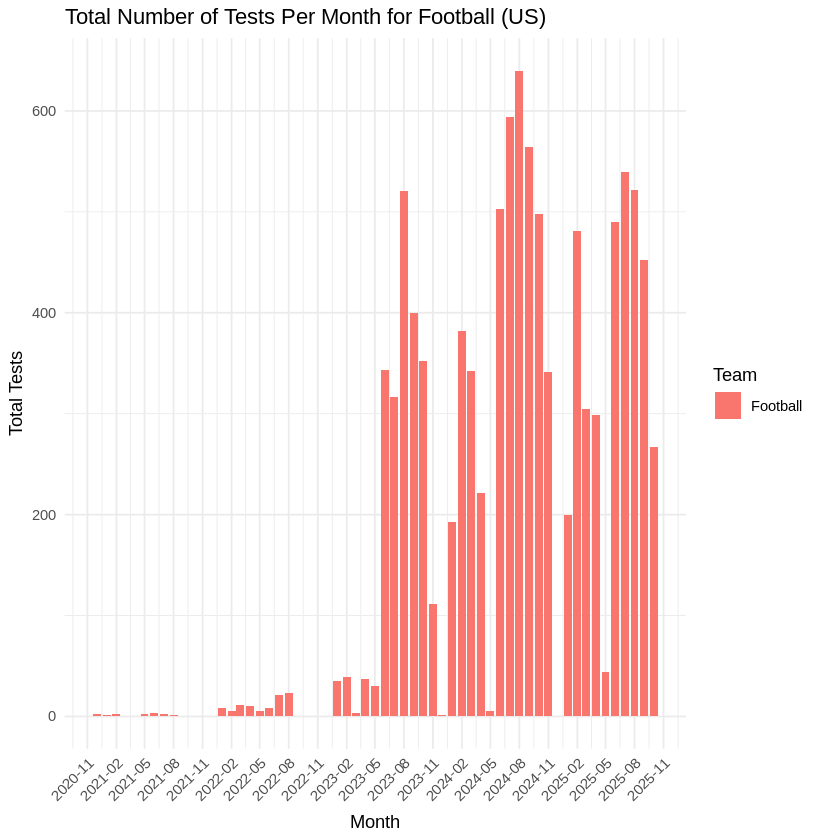

In [62]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Football") %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month for Football (US)",
           x = "Month",
           y = "Total Tests",
           fill = "Team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

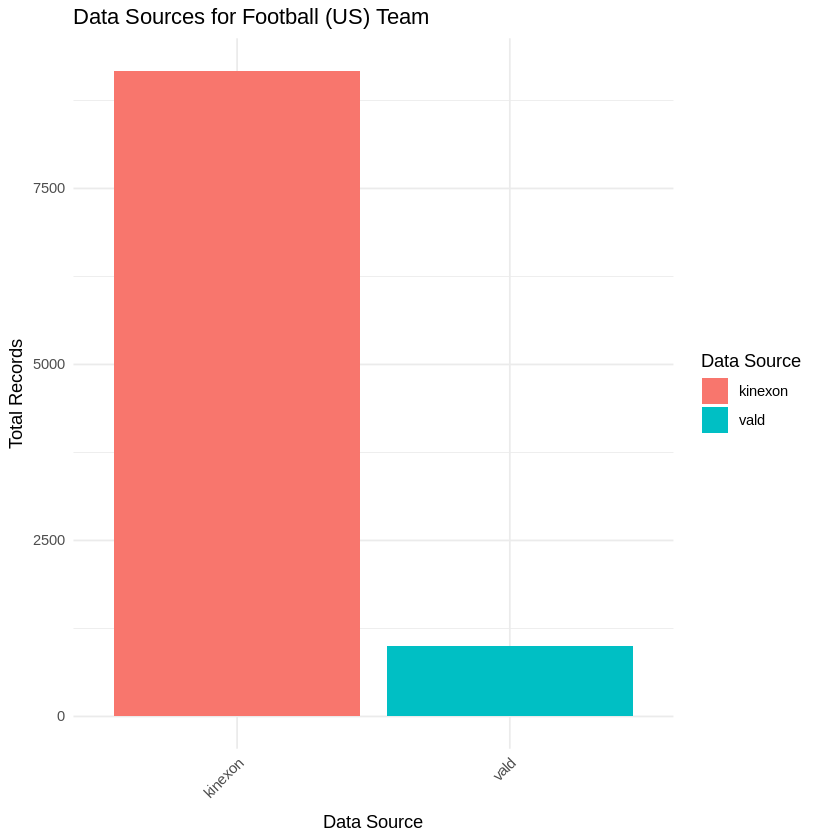

In [63]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Football") %>%
    group_by(data_source) %>%
    summarise(total_records = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = reorder(data_source, -total_records), y = total_records, fill = data_source)) +
      geom_bar(stat = "identity") +
      labs(title = "Data Sources for Football (US) Team",
           x = "Data Source",
           y = "Total Records",
           fill = "Data Source") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  } else {
    print("No data found for 'Football (US)' team.")
  }
}

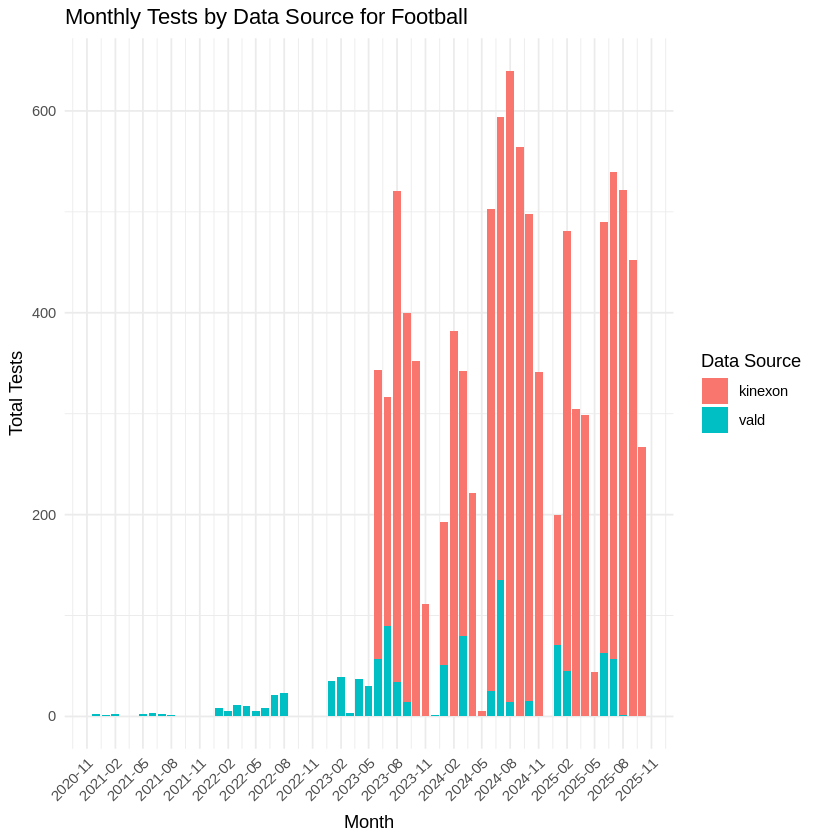

In [64]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Football") %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Monthly Tests by Data Source for Football",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

[1] "Percentage of Source Testing for Football:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      9174      90.2 
2 vald         1001       9.84


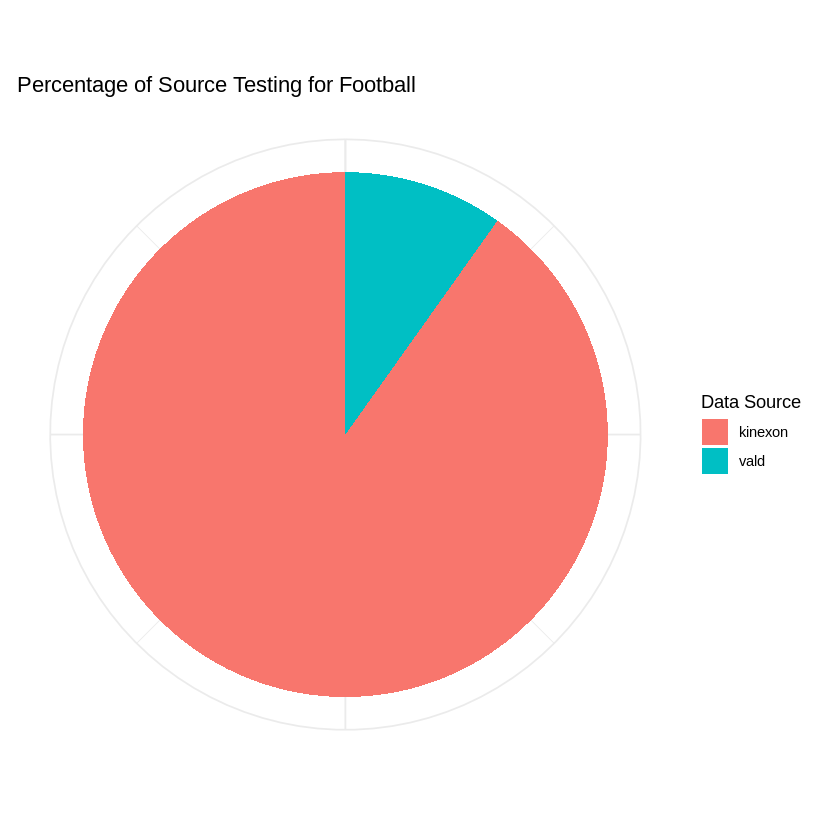

In [91]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Football")

  if (nrow(monthly_tests_by_team) > 0) {
    source_percentages <- monthly_tests_by_team %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Football:")
    print(source_percentages)

  ggplot(source_percentages, aes(x = "", y = percentage, fill = data_source)) +
      geom_bar(width = 1, stat = "identity") +
      coord_polar("y", start = 0) +
      labs(title = "Percentage of Source Testing for Football",
           fill = "Data Source",
           y = "Percentage") +
      theme_minimal() +
      theme(axis.text.x = element_blank(),
            axis.title.x = element_blank(),
            axis.title.y = element_blank())
  }
}

Warning message:
“Removed 1110 rows containing missing values or values outside the scale range
(`geom_line()`).”


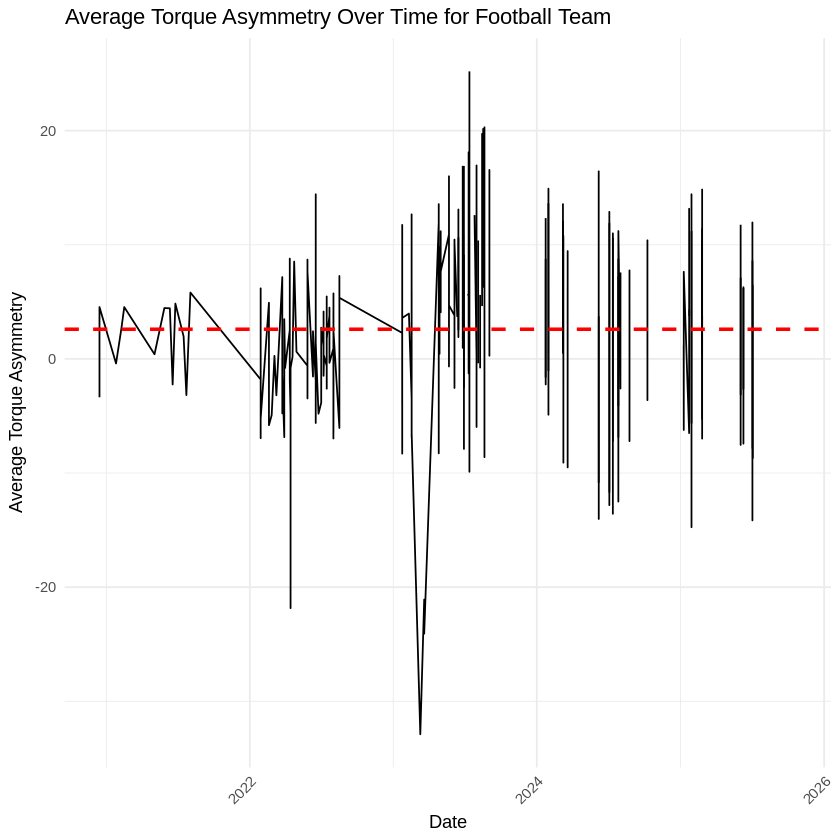

In [108]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Football") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    average_asymmetry <- asymmetry_data %>%
      summarise(mean_asymmetry = mean(avg_torque_asymmetry, na.rm = TRUE)) %>%
      pull(mean_asymmetry)

    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      geom_hline(yintercept = average_asymmetry, linetype = "dashed", color = "red", size = 1) +
      labs(title = "Average Torque Asymmetry Over Time for Football Team",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

Warning message:
“Removed 1110 rows containing missing values or values outside the scale range
(`geom_line()`).”


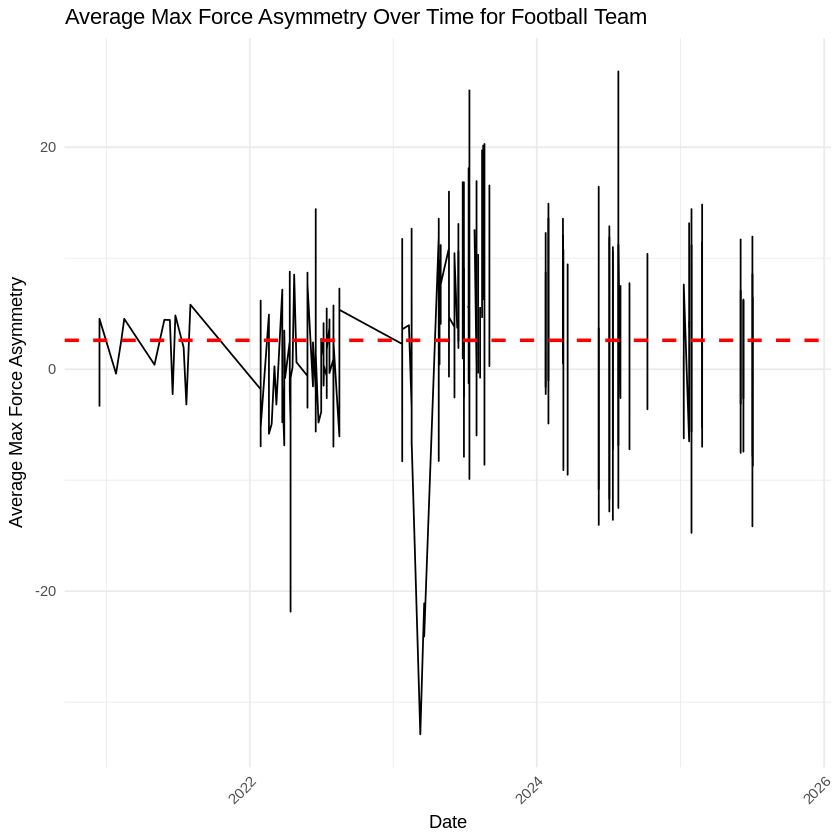

In [109]:
# max force asymmetry
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_max_force_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Football") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    average_asymmetry <- asymmetry_data %>%
      summarise(mean_asymmetry = mean(avg_max_force_asymmetry, na.rm = TRUE)) %>%
      pull(mean_asymmetry)

    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_max_force_asymmetry)) +
      geom_line() +
      geom_hline(yintercept = average_asymmetry, linetype = "dashed", color = "red", size = 1) +
      labs(title = "Average Max Force Asymmetry Over Time for Football Team",
           x = "Date",
           y = "Average Max Force Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

note: kinexon is used for total distance and accel load data collection. vald is used for torque and max force.

# mens basketball

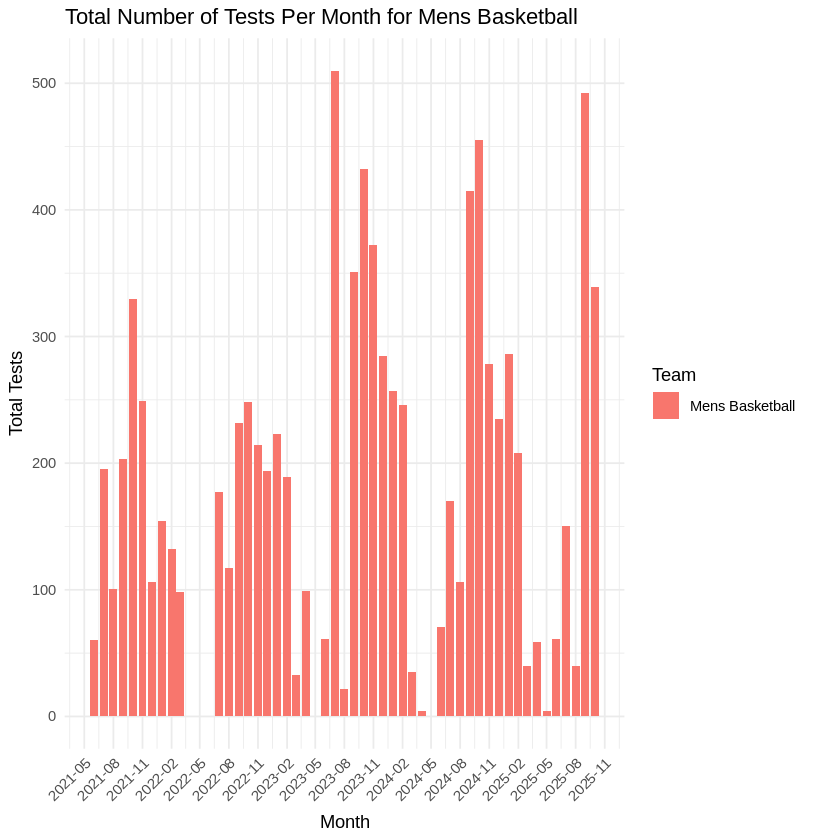

In [65]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Mens Basketball") %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month for Mens Basketball",
           x = "Month",
           y = "Total Tests",
           fill = "Team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

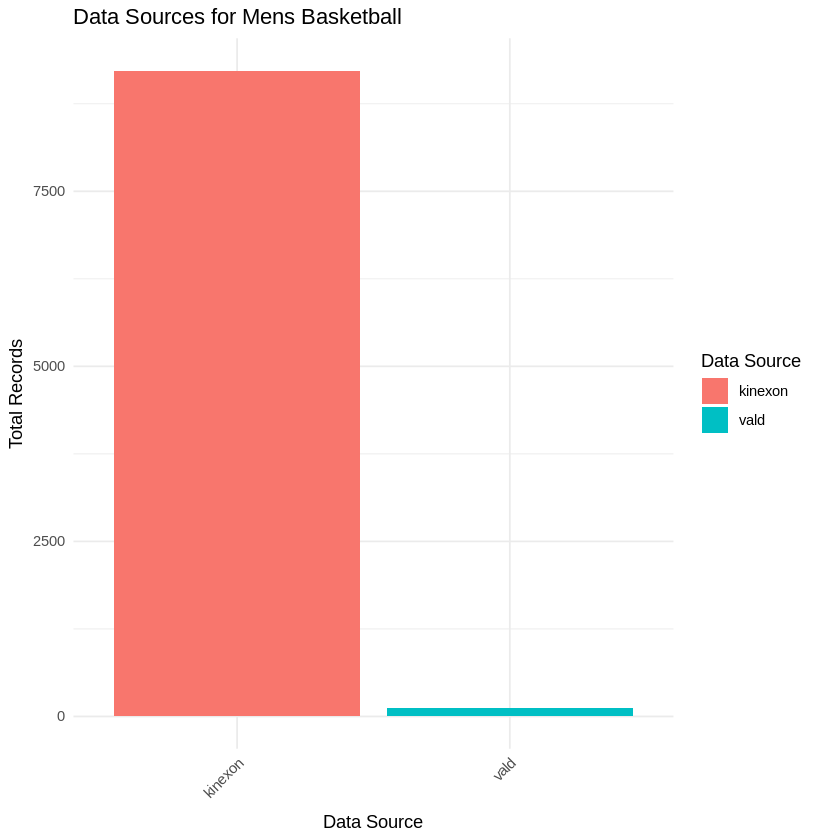

In [66]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Mens Basketball") %>%
    group_by(data_source) %>%
    summarise(total_records = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = reorder(data_source, -total_records), y = total_records, fill = data_source)) +
      geom_bar(stat = "identity") +
      labs(title = "Data Sources for Mens Basketball",
           x = "Data Source",
           y = "Total Records",
           fill = "Data Source") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

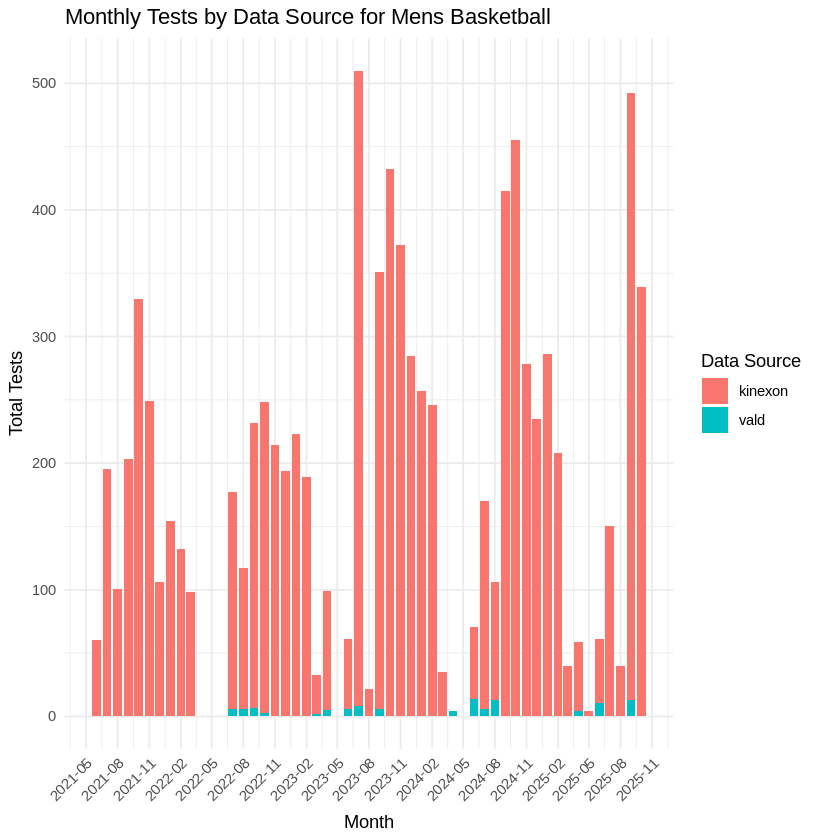

In [67]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
  monthly_tests_mens_basketball_by_source <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Mens Basketball") %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_mens_basketball_by_source) > 0) {
    ggplot(monthly_tests_mens_basketball_by_source, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Monthly Tests by Data Source for Mens Basketball",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

[1] "Percentage of Source Testing for Men's Basketball:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      9224      98.8 
2 vald          114       1.22


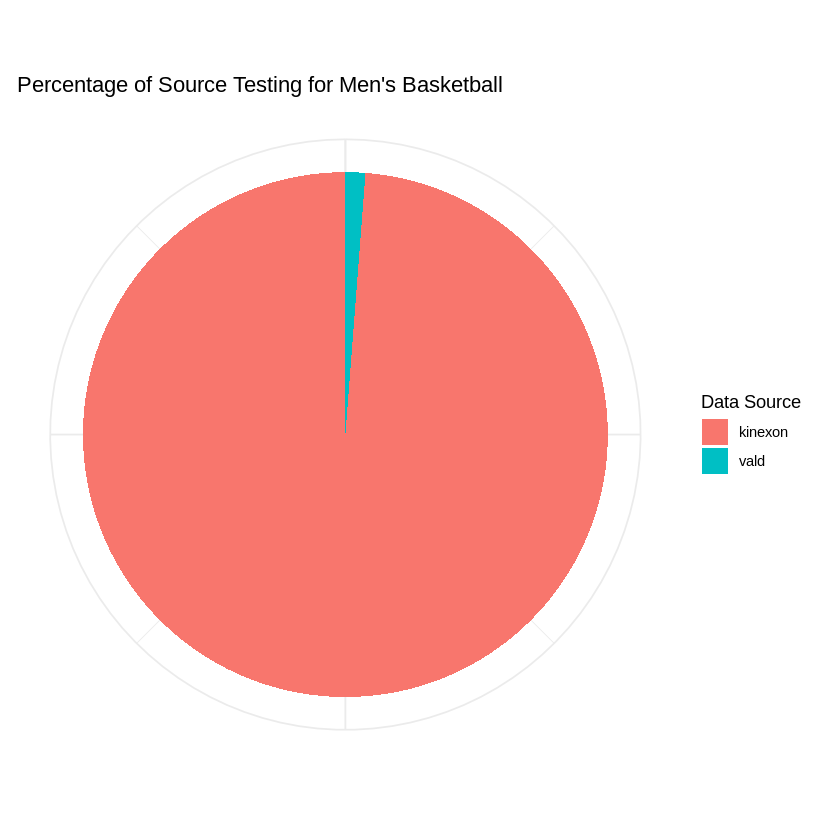

In [90]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Mens Basketball")

  if (nrow(monthly_tests_by_team) > 0) {
    source_percentages <- monthly_tests_by_team %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Men's Basketball:")
    print(source_percentages)

  ggplot(source_percentages, aes(x = "", y = percentage, fill = data_source)) +
      geom_bar(width = 1, stat = "identity") +
      coord_polar("y", start = 0) +
      labs(title = "Percentage of Source Testing for Men's Basketball",
           fill = "Data Source",
           y = "Percentage") +
      theme_minimal() +
      theme(axis.text.x = element_blank(),
            axis.title.x = element_blank(),
            axis.title.y = element_blank())
  }
}

Warning message:
“Removed 2409 rows containing missing values or values outside the scale range
(`geom_line()`).”


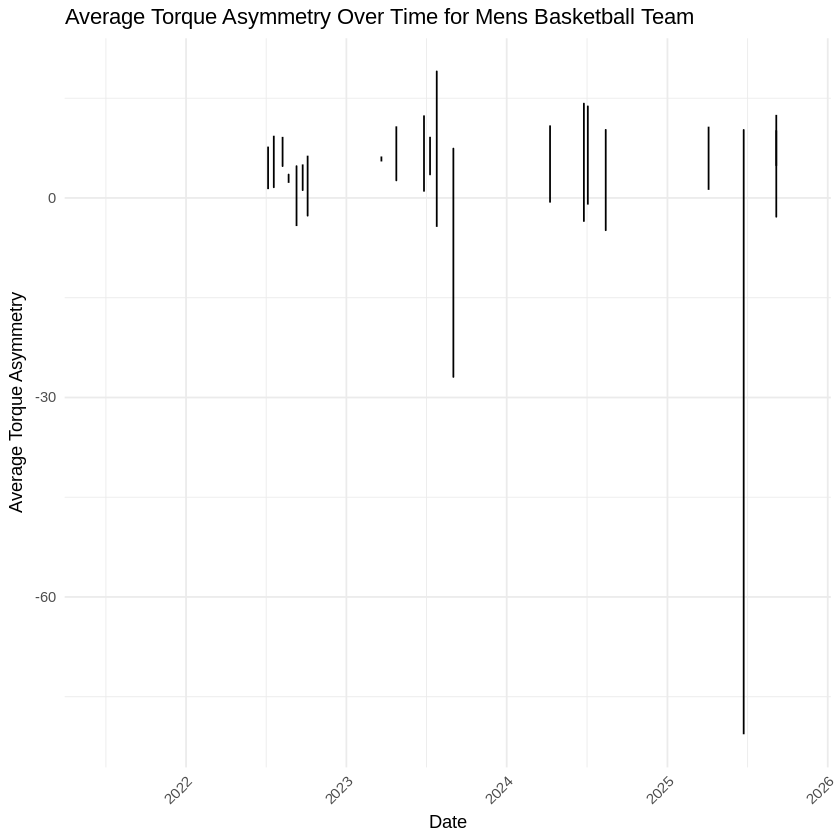

In [101]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Mens Basketball") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      labs(title = "Average Torque Asymmetry Over Time for Mens Basketball Team",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

# Womens basketball

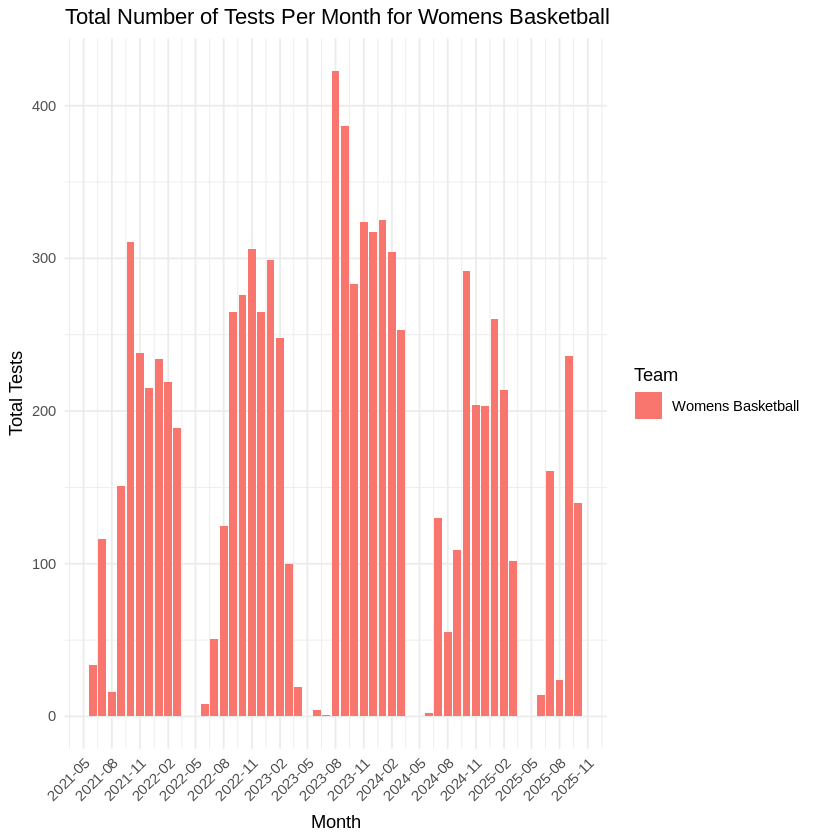

In [68]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Womens Basketball") %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month for Womens Basketball",
           x = "Month",
           y = "Total Tests",
           fill = "Team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

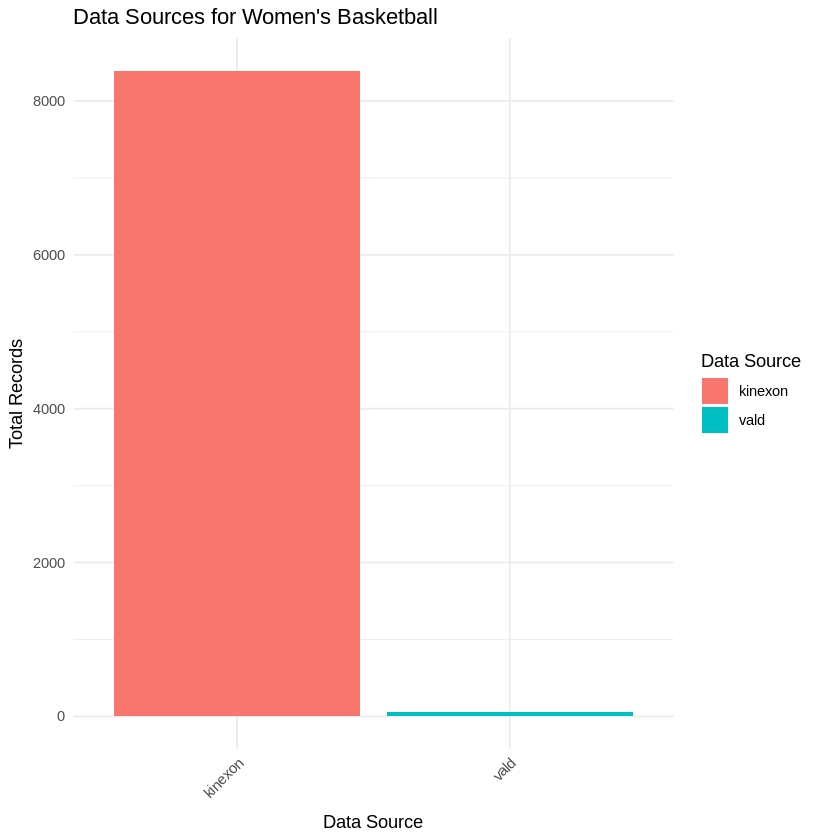

In [69]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Womens Basketball") %>%
    group_by(data_source) %>%
    summarise(total_records = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = reorder(data_source, -total_records), y = total_records, fill = data_source)) +
      geom_bar(stat = "identity") +
      labs(title = "Data Sources for Women's Basketball",
           x = "Data Source",
           y = "Total Records",
           fill = "Data Source") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

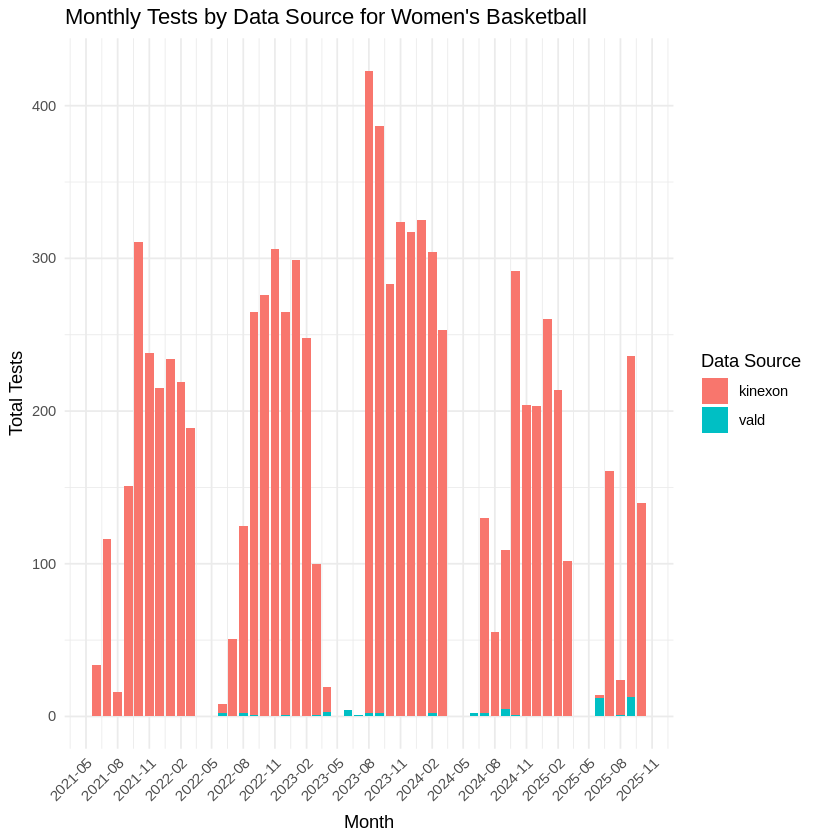

In [75]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
 monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Womens Basketball") %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Monthly Tests by Data Source for Women's Basketball",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

[1] "Percentage of Source Testing for Women's Basketball:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      8395     99.3  
2 vald           57      0.674


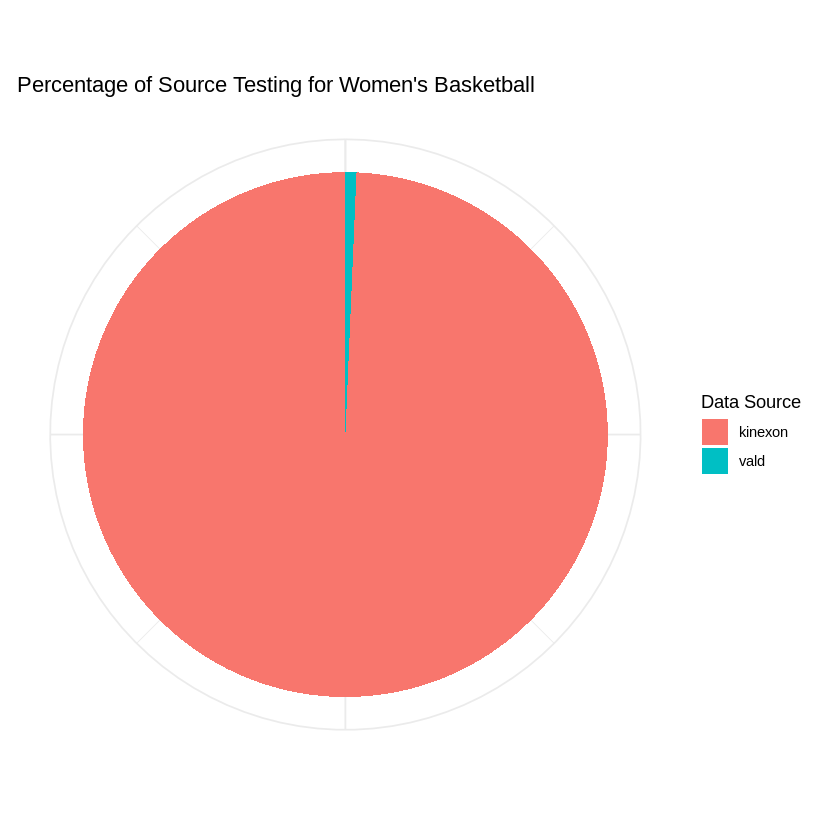

In [89]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Womens Basketball")

  if (nrow(monthly_tests_by_team) > 0) {
    source_percentages <- monthly_tests_by_team %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Women's Basketball:")
    print(source_percentages)

  ggplot(source_percentages, aes(x = "", y = percentage, fill = data_source)) +
      geom_bar(width = 1, stat = "identity") +
      coord_polar("y", start = 0) +
      labs(title = "Percentage of Source Testing for Women's Basketball",
           fill = "Data Source",
           y = "Percentage") +
      theme_minimal() +
      theme(axis.text.x = element_blank(),
            axis.title.x = element_blank(),
            axis.title.y = element_blank())
  }
}

Warning message:
“Removed 2075 rows containing missing values or values outside the scale range
(`geom_line()`).”


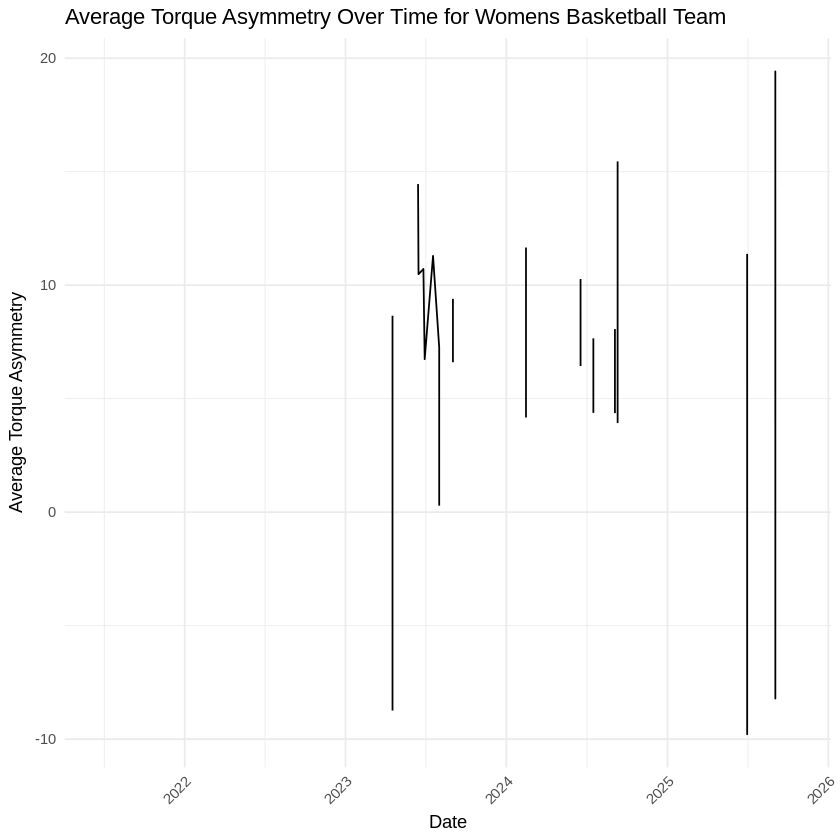

In [102]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Womens Basketball") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      labs(title = "Average Torque Asymmetry Over Time for Womens Basketball Team",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

# Womens soccer

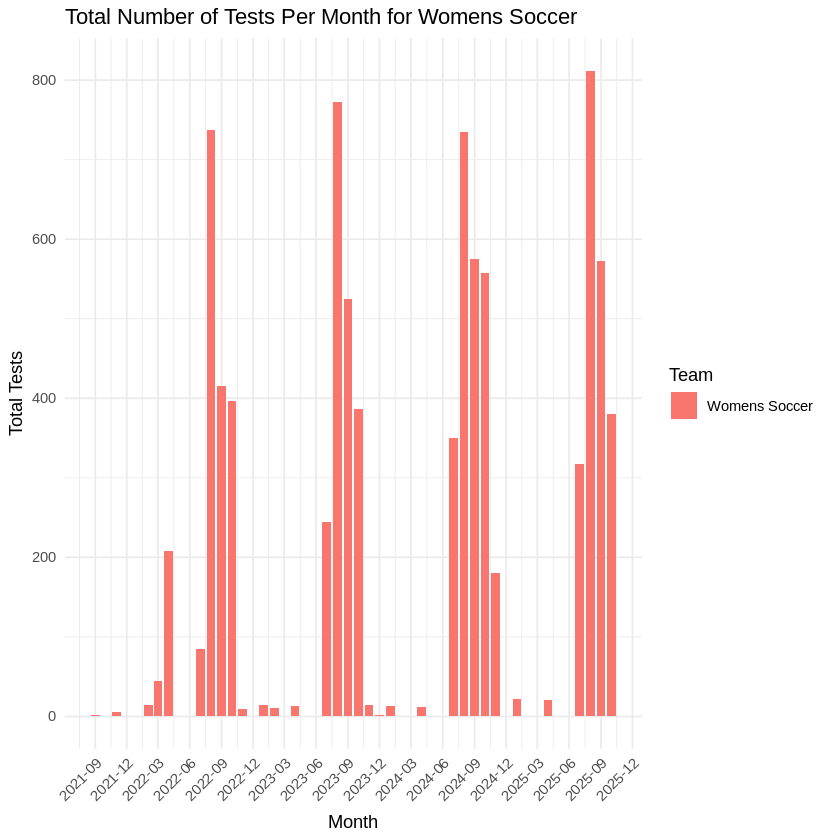

In [71]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Womens Soccer") %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month for Womens Soccer",
           x = "Month",
           y = "Total Tests",
           fill = "Team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

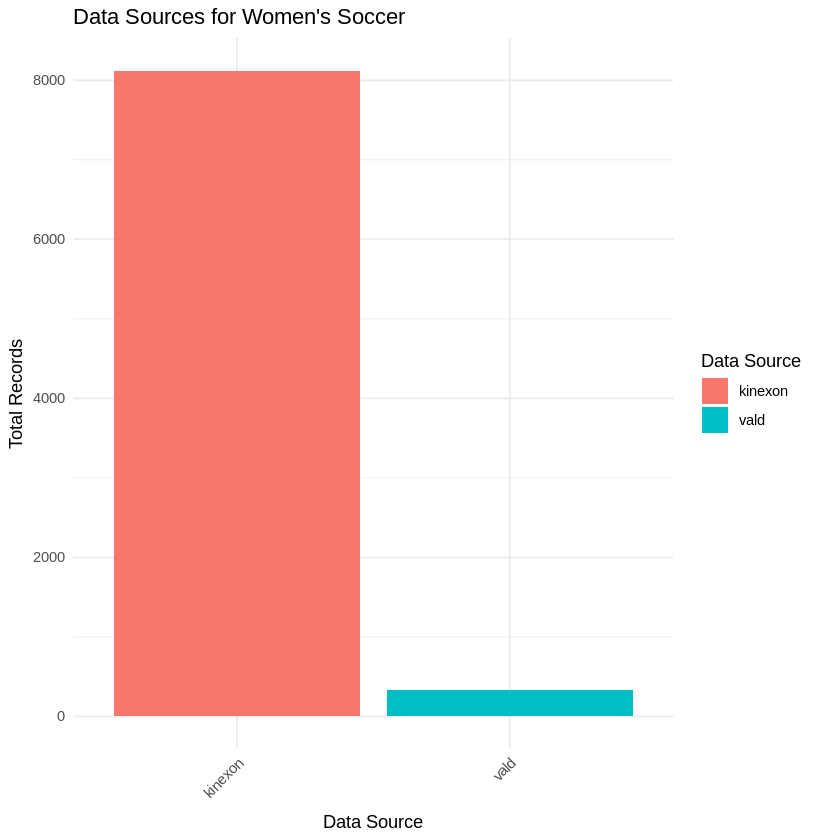

In [72]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Womens Soccer") %>%
    group_by(data_source) %>%
    summarise(total_records = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = reorder(data_source, -total_records), y = total_records, fill = data_source)) +
      geom_bar(stat = "identity") +
      labs(title = "Data Sources for Women's Soccer",
           x = "Data Source",
           y = "Total Records",
           fill = "Data Source") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

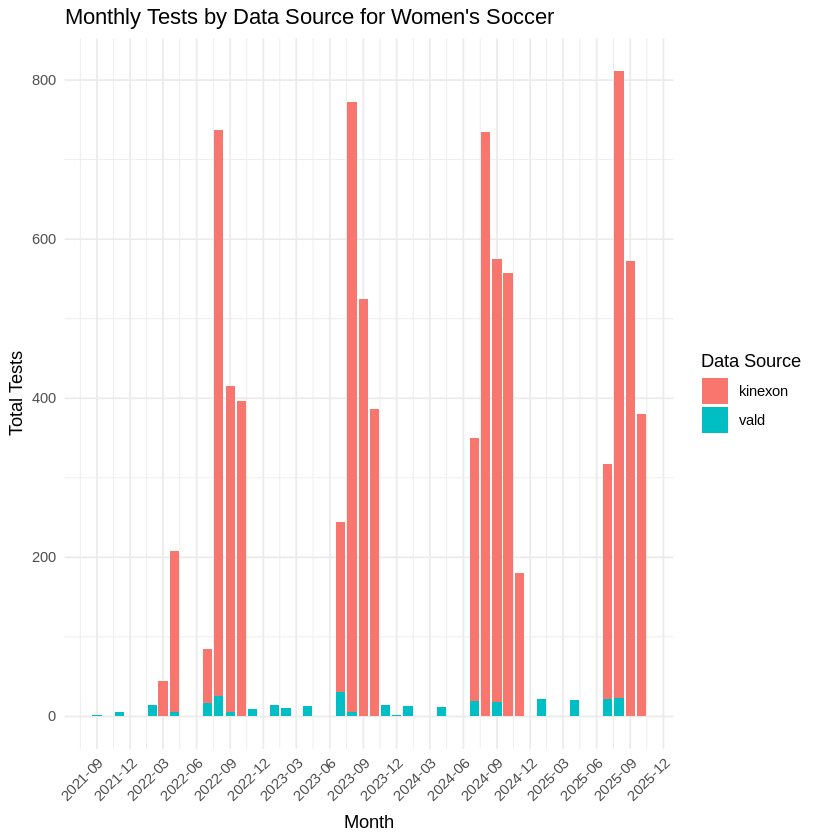

In [73]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Womens Soccer") %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Monthly Tests by Data Source for Women's Soccer",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

[1] "Percentage of Source Testing for Women's Soccer:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      8122      96.1 
2 vald          330       3.90


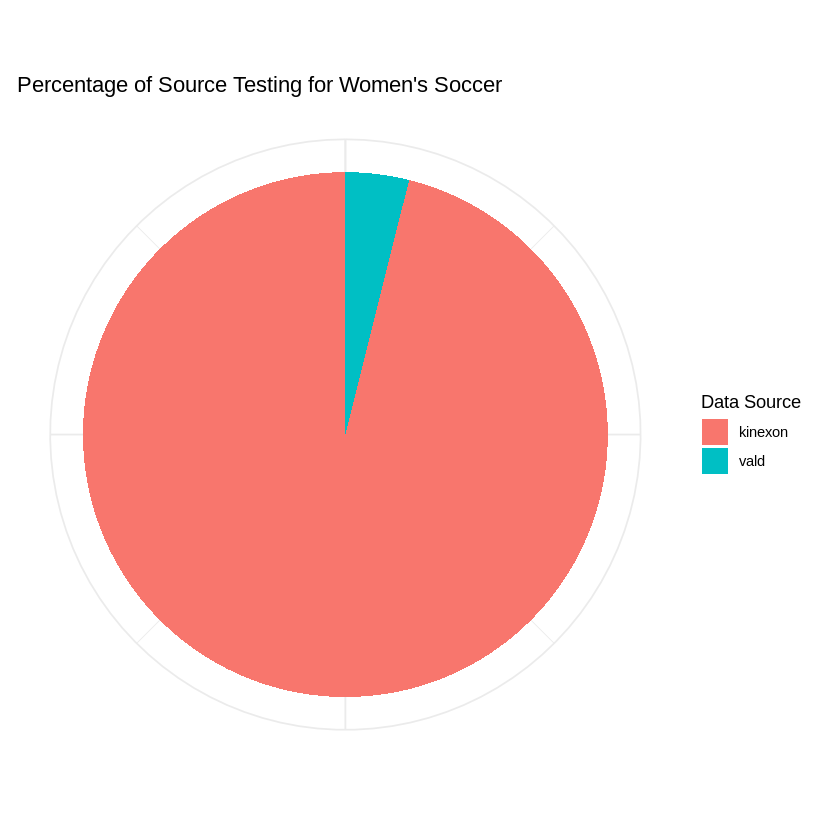

In [86]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Womens Soccer")

  if (nrow(monthly_tests_by_team) > 0) {
    source_percentages <- monthly_tests_by_team %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Women's Soccer:")
    print(source_percentages)

  ggplot(source_percentages, aes(x = "", y = percentage, fill = data_source)) +
      geom_bar(width = 1, stat = "identity") +
      coord_polar("y", start = 0) +
      labs(title = "Percentage of Source Testing for Women's Soccer",
           fill = "Data Source",
           y = "Percentage") +
      theme_minimal() +
      theme(axis.text.x = element_blank(),
            axis.title.x = element_blank(),
            axis.title.y = element_blank())
  }
}

Warning message:
“Removed 1073 rows containing missing values or values outside the scale range
(`geom_line()`).”


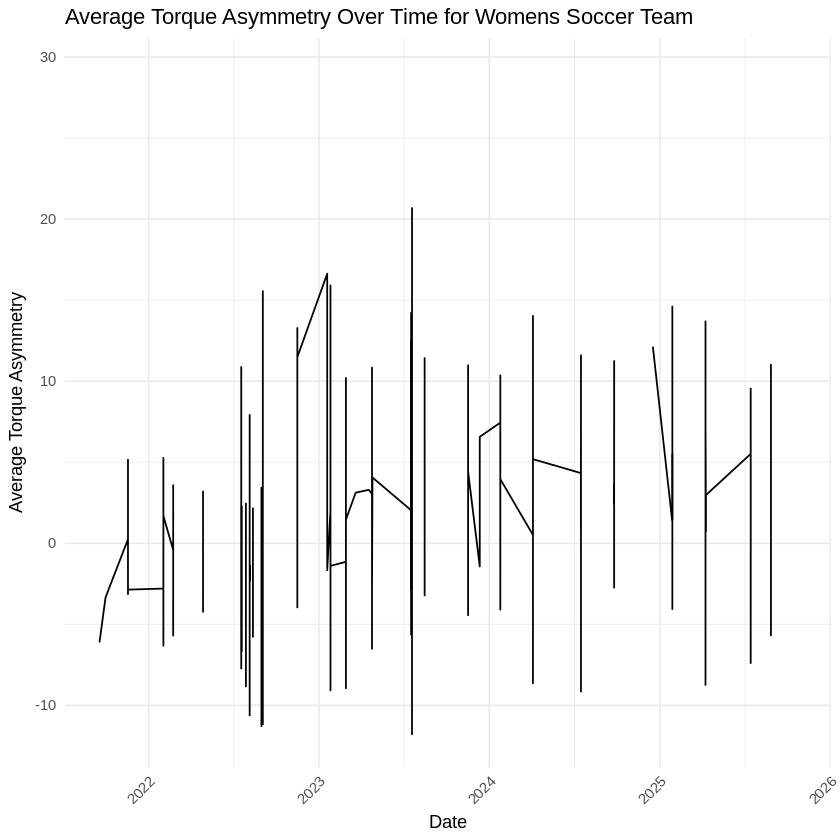

In [103]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Womens Soccer") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      labs(title = "Average Torque Asymmetry Over Time for Womens Soccer Team",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

# Mens soccer

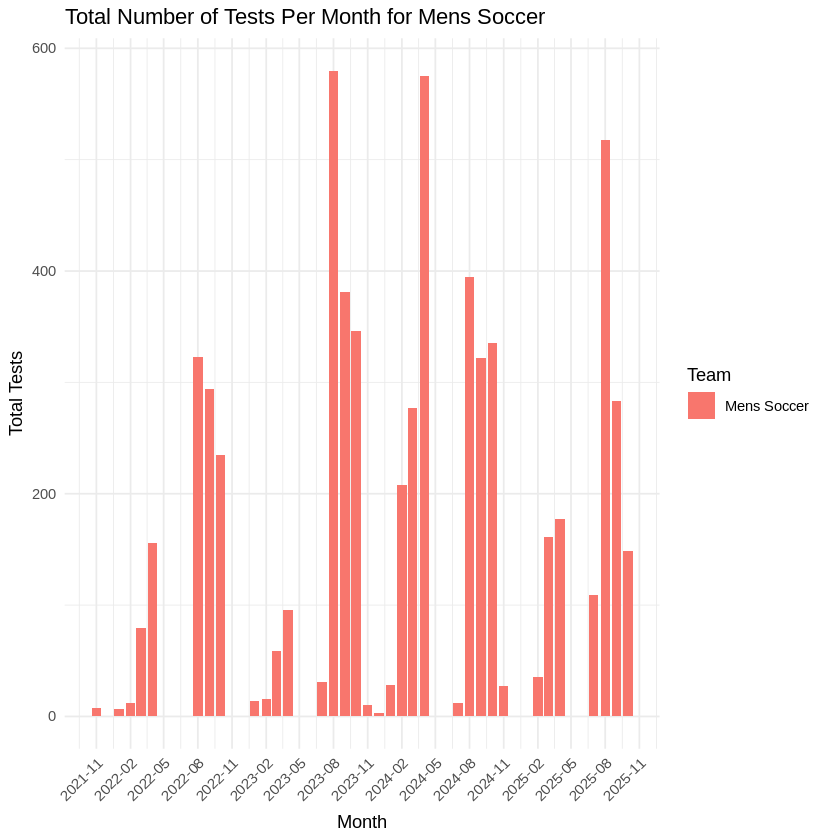

In [76]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Mens Soccer") %>%
    group_by(month_year, team) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = team)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Total Number of Tests Per Month for Mens Soccer",
           x = "Month",
           y = "Total Tests",
           fill = "Team") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

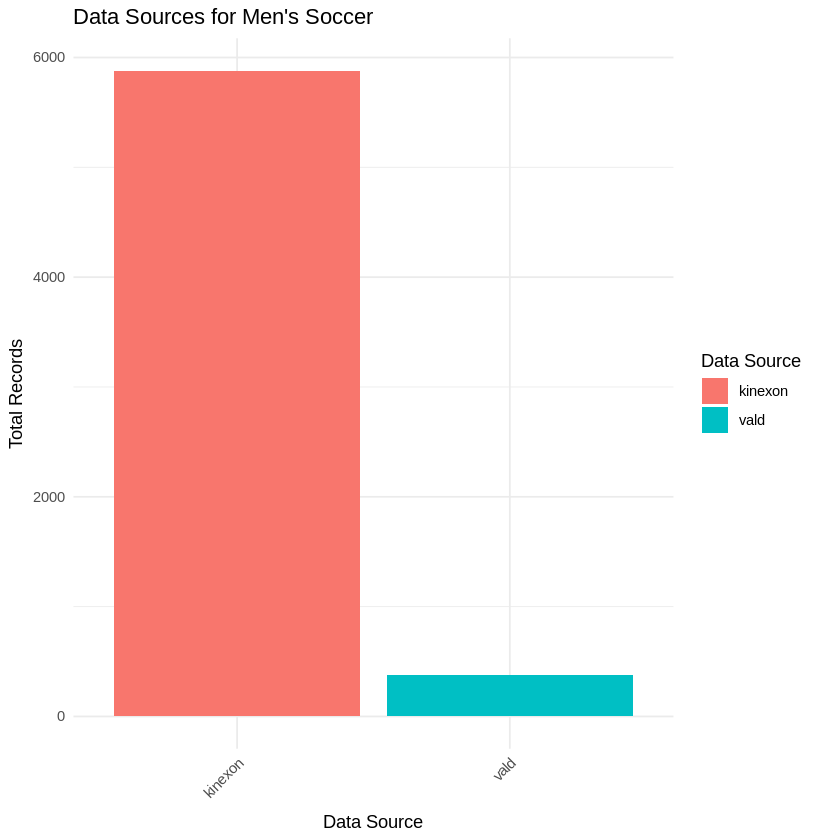

In [77]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Mens Soccer") %>%
    group_by(data_source) %>%
    summarise(total_records = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = reorder(data_source, -total_records), y = total_records, fill = data_source)) +
      geom_bar(stat = "identity") +
      labs(title = "Data Sources for Men's Soccer",
           x = "Data Source",
           y = "Total Records",
           fill = "Data Source") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

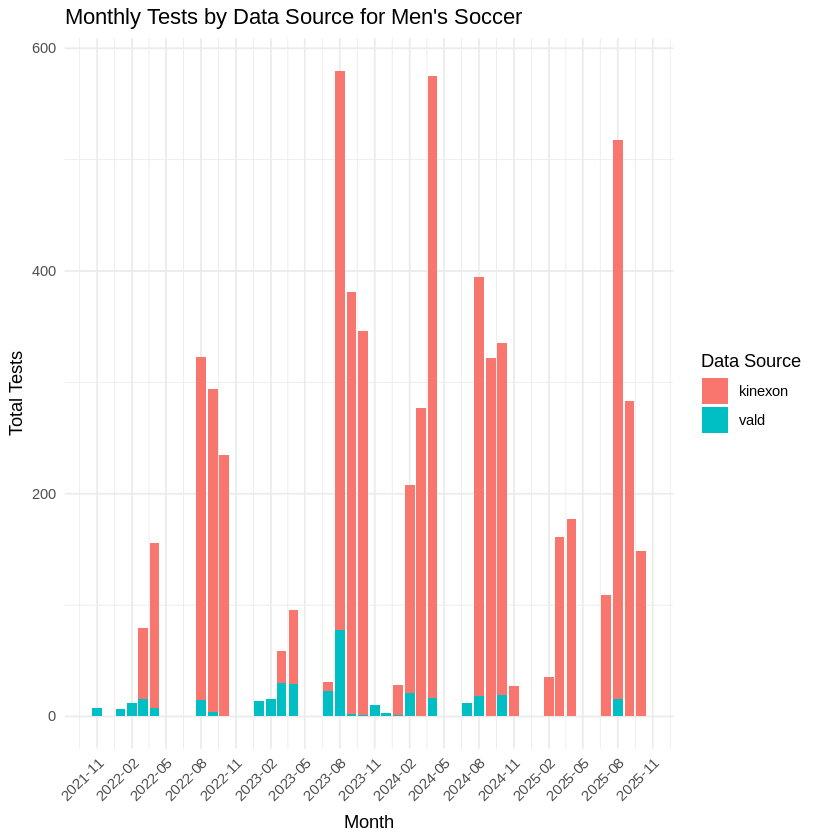

In [92]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "data_source" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed)) %>%
    mutate(month_year = floor_date(record_date_parsed, "month")) %>%
    filter(team == "Mens Soccer") %>%
    group_by(month_year, data_source) %>%
    summarise(total_tests = n(), .groups = 'drop')

  if (nrow(monthly_tests_by_team) > 0) {
    ggplot(monthly_tests_by_team, aes(x = month_year, y = total_tests, fill = data_source)) +
      geom_bar(stat = "identity", position = "stack") +
      labs(title = "Monthly Tests by Data Source for Men's Soccer",
           x = "Month",
           y = "Total Tests",
           fill = "Data Source") +
      theme_minimal() +
      scale_x_date(date_breaks = "3 months", date_labels = "%Y-%m") +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

In [81]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  mens_soccer_data <- all_records_data %>%
    filter(team == "Mens Soccer")

  if (nrow(mens_soccer_data) > 0) {
    source_percentages <- mens_soccer_data %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Mens Soccer:")
    print(source_percentages)
 }
}

[1] "Percentage of Source Testing for Mens Soccer:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      5881      93.9 
2 vald          380       6.07


[1] "Percentage of Source Testing for Mens Soccer:"
# A tibble: 2 × 3
  data_source count percentage
  <chr>       <int>      <dbl>
1 kinexon      5881      93.9 
2 vald          380       6.07


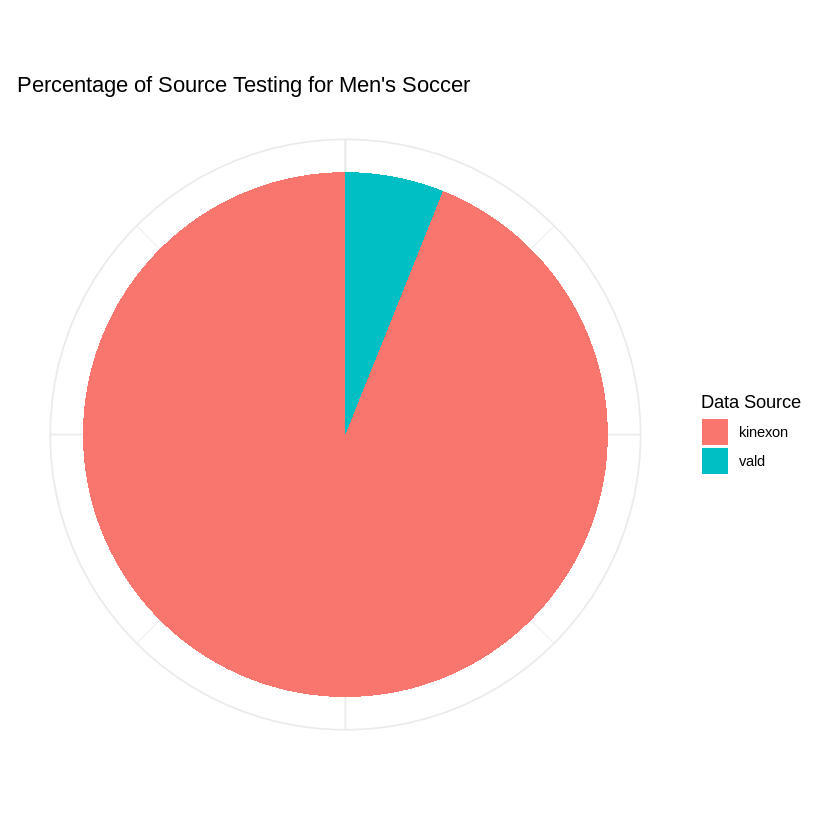

In [87]:
if ("data_source" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data)) {
  monthly_tests_by_team <- all_records_data %>%
    filter(team == "Mens Soccer")

  if (nrow(monthly_tests_by_team) > 0) {
    source_percentages <- monthly_tests_by_team %>%
      group_by(data_source) %>%
      summarise(count = n(), .groups = 'drop') %>%
      mutate(percentage = (count / sum(count)) * 100)

    print("Percentage of Source Testing for Mens Soccer:")
    print(source_percentages)

  ggplot(source_percentages, aes(x = "", y = percentage, fill = data_source)) +
      geom_bar(width = 1, stat = "identity") +
      coord_polar("y", start = 0) +
      labs(title = "Percentage of Source Testing for Men's Soccer",
           fill = "Data Source",
           y = "Percentage") +
      theme_minimal() +
      theme(axis.text.x = element_blank(),
            axis.title.x = element_blank(),
            axis.title.y = element_blank())
  }
}

Warning message:
“Removed 921 rows containing missing values or values outside the scale range
(`geom_line()`).”


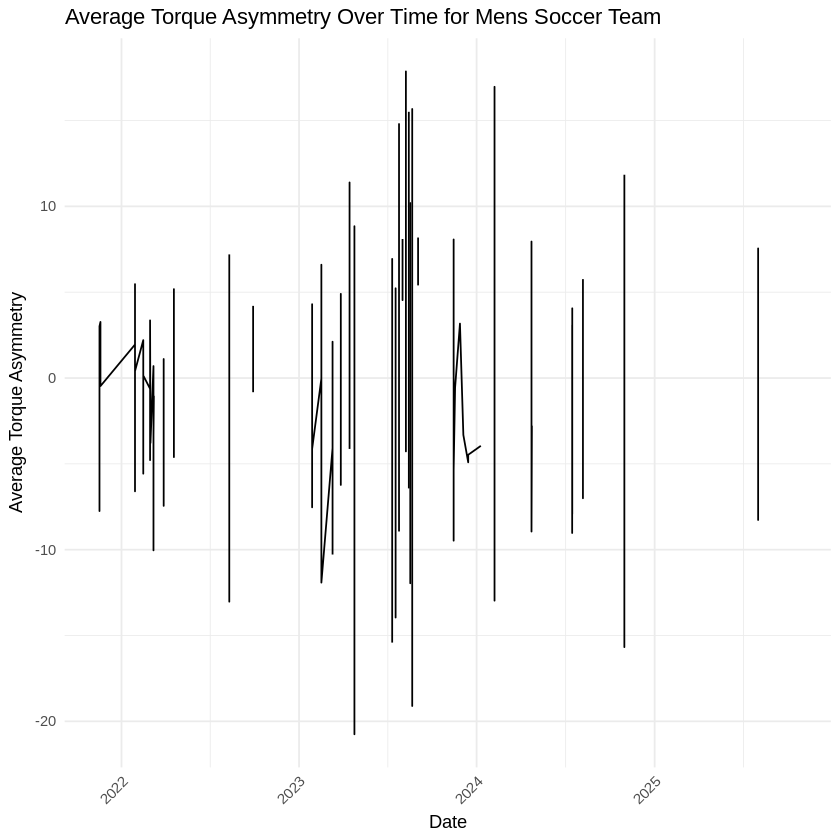

In [104]:
if ("timestamp" %in% colnames(all_records_data) && "team" %in% colnames(all_records_data) && "avg_torque_asymmetry" %in% colnames(all_records_data)) {
  asymmetry_data <- all_records_data %>%
    filter(team == "Mens Soccer") %>%
    mutate(record_date_parsed = parse_date_time(timestamp, orders = c("ymd HMS", "ymd", "mdy HMS", "mdy", "dmy HMS", "dmy", "%Y-%m-%d %H:%M:%S"))) %>%
    filter(!is.na(record_date_parsed))

  if (nrow(asymmetry_data) > 0) {
    ggplot(asymmetry_data, aes(x = record_date_parsed, y = avg_torque_asymmetry)) +
      geom_line() +
      labs(title = "Average Torque Asymmetry Over Time for Mens Soccer Team",
           x = "Date",
           y = "Average Torque Asymmetry") +
      theme_minimal() +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  }
}

# Identify any gaps or unusual patterns in data collection
-----

Significant gaps seen within the data show that there is a significant disparity of metric testing. Seen in the visualizations for all sports shown, Kinexion has more tests done compared to Vald. Kinexion is used to test total distance and acceleration load accumulation and Vald is used for testing torque and max force.  

Based on visualizations for Women's soccer, Women's soccer has more consistency with adhering to periodic testic compared to other sports teams based on output pattern on vald data.

Basketball has many gaps for torque and max force testing for both Men's and Women's teams with minimal testing. Men's testing percentage of vald data amounts to 1.22% of the total and Women's amounts to 0.674%. Men's basketball also has double the count of vald data, compared to Women's Basketball count. (114 to 57)

Football also has seems to have a testing pattern observed in the team's chart. Football's Vald usage increases typically in the beginning of the school year.

Based on data from both Soccer and Basketball, Men's team has a higher percentage of Vald usage for testing compared to the Women's teams for both sports.

In terms of time, across all teams, From January 2020 to August 2021 has a significant lack of testing which is correlated to Covid lockdown in which athletics team activity was held during this time period. Testing amount had then increased for the Fall 2021 semester.